In [ ]:
# The purpose of this research project is to ask the following questions:
#    1) How have LA slow-street ordinances increased access to outdoor space?
#            a) What did access to open-space look like before COVID?
#            b) Have slow-streets increased access?

#        Are neighborhoods with existing health vulnerability getting equitable access?

In [ ]:
# This research project undergoes three data processes:
# 1) Map health morbidities, using 2013-2014 data collected at the zip code level by the California Health Interview Survey Neighborhood Edition.
# 2) Map existing City of LA parks &  rec space, provdied by LA Parks & Rec (2020)
# 3) Map currently implemented LA Slow Streets

In [ ]:
# Begin by importing data commands

In [2]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as pltimport

import matplotlib.pyplot as plt

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [ ]:
# Import each dataset used. All files were downloaded as kml, kmz, or geojson files.

In [3]:
obese = gpd.read_file('data/ObeseLA.geojson')

In [4]:
heart = gpd.read_file('data/HeartLA.json')

In [5]:
asthma = gpd.read_file('data/Prevalence_of_Adult_Asthma,_2013-2014.geojson')

In [6]:
streetsLA= gpd.read_file('data/Implemented_Slow_Streets.geojson')

In [7]:
walkLA= gpd.read_file('data/WalkLA150min.geojson')

In [8]:
parksLA= gpd.read_file('data/Recreation_and_Parks.geojson')

In [ ]:
# Let's understand what some of the fields look like for each dataset. This will help us clean data & map later.

In [9]:
# What are the fields within the obesity data set?
list(obese)

['OBJECTID_1',
 'ZIPCODE',
 'Percent_',
 'LowerCL',
 'UpperCL',
 'Population',
 'Shape__Are',
 'Shape__Len',
 'geometry']

In [11]:
# What are the fields within the heart disease data set?
list(heart)

['OBJECTID',
 'ZIPCODE',
 'Percent_',
 'LowerCL',
 'UpperCL',
 'Population',
 'Shape__Are',
 'Shape__Len',
 'geometry']

In [10]:
# What are the fields within the exercise data set?
list(walkLA)

['OBJECTID',
 'ZIPCODE',
 'Percent_',
 'LowerCL',
 'UpperCL',
 'Population',
 'Shape__Area',
 'Shape__Length',
 'geometry']

In [12]:
# What are the fields within the parks data set?
list(parksLA)

['OBJECTID',
 'Area_Acres',
 'Park_ID',
 'CD_Real',
 'Address',
 'Region',
 'Park_Class',
 'CD_NEW',
 'TOOLTIP',
 'ACRES',
 'name',
 'geometry']

In [13]:
# What are the fields within the slow streets data set?
list(streetsLA)

['name', 'description', 'tessellate', 'geometry']

In [14]:
# Let's find out what the average statistics are regarding obesity in LA.
# What is the average statistics for obesity in City of LA zip codes?
obese['Percent_'].describe()

count    120.000000
mean      23.953333
std        7.639811
min       10.600000
25%       18.100000
50%       21.650000
75%       28.800000
max       40.100000
Name: Percent_, dtype: float64

In [ ]:
# The mean percentage of respodents within obesity per zip code is 23.95 percent. The highest value a zip code has is 40.1 percent and the lowest 10.6 percent.

In [16]:
# The average obesity prevalence rate within City of LA zip codes is about 24 percent of the 18+ population.
# The lowest prevalence rate is 10.6 percent, and the highest is 40.1 percent.

In [65]:
# Let's look at park data. How many different types of parks are there in LA? How does the City organize the data?

In [66]:
parksLA['Park_Class'].value_counts()

N    307
C    118
R     54
Name: Park_Class, dtype: int64

In [ ]:
# Let's make this into an index that way we can plot the total for each park type.

In [19]:
parks_count = parksLA['Park_Class'].value_counts()
parks_count = parks_count.reset_index()
parks_count

index  Park_Class
0     N         307
1     C         118
2     R          54

In [ ]:
# Let's relabel the columns for the parks dataset.

In [20]:
parks_count.columns = ['Park Type', 'Count']
parks_count

Park Type  Count
0         N    307
1         C    118
2         R     54

In [ ]:
# Make a bar graph for the counts of LA's parks

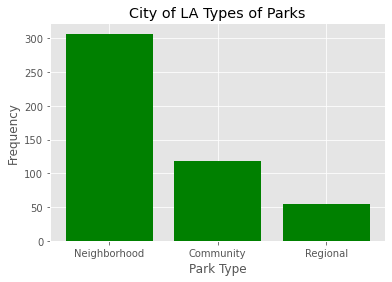

In [67]:
%matplotlib inline
plt.style.use('ggplot')

x = ['Neighborhood', 'Community', 'Regional']
parks = [307, 118, 54]

plt.bar(x_pos, parks, color='green')
plt.xlabel("Park Type")
plt.ylabel("Frequency")
plt.title("City of LA Types of Parks")

plt.xticks(x_pos, x)

plt.show()

In [ ]:
# Note to self, probably could make this without the gray background.

In [ ]:
# Let's repeat this process using the exercise data, so we can make a histogram of the percent of adults who walk at least 150 min per week.

In [22]:
walkLA['Percent_'].value_counts()

32.2    5
34.3    4
32.9    4
32.4    4
34.8    4
       ..
32.7    1
31.8    1
46.9    1
45.1    1
37.0    1
Name: Percent_, Length: 74, dtype: int64

In [23]:
walkLA_count = walkLA['Percent_'].value_counts()
walkLA_count = walkLA_count.reset_index()
walkLA_count

index  Percent_
0    32.2         5
1    34.3         4
2    32.9         4
3    32.4         4
4    34.8         4
..    ...       ...
69   32.7         1
70   31.8         1
71   46.9         1
72   45.1         1
73   37.0         1

[74 rows x 2 columns]

In [24]:
walkLA_count.columns = ['Percent within Zip', 'Zip Code Frequency']
walkLA_count

Percent within Zip  Zip Code Frequency
0                 32.2                   5
1                 34.3                   4
2                 32.9                   4
3                 32.4                   4
4                 34.8                   4
..                 ...                 ...
69                32.7                   1
70                31.8                   1
71                46.9                   1
72                45.1                   1
73                37.0                   1

[74 rows x 2 columns]

In [ ]:
# We now have a cleaned variable for us to look at what the exercise rate is across the City.

In [ ]:
# Make a histogram!

Text(0, 0.5, 'Frequency')

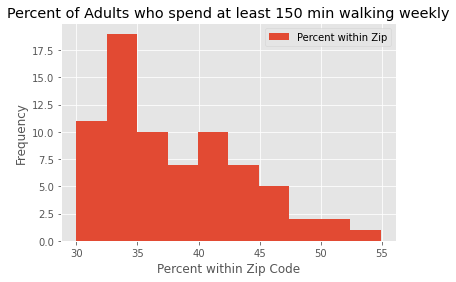

In [25]:
walkLA_count.plot.hist(x= 'Zip Code Frequency', y='Percent within Zip')
plt.title('Percent of Adults who spend at least 150 min walking weekly')
plt.xlabel('Percent within Zip Code')
plt.ylabel('Frequency')

In [ ]:
# 17+ zip codes can say that ~35% of their respondents walk at least 150 min per week.

In [ ]:
# Repeat the process with obesity data and make another histogram:

In [26]:
obese_count = obese['Percent_'].value_counts()
obese_count = obese_count.reset_index()
obese_count.columns = ['Percent within Zip', 'Zip Code Frequency']
obese_count

Percent within Zip  Zip Code Frequency
0                 21.5                   3
1                 29.4                   3
2                 20.0                   3
3                 20.5                   2
4                 16.4                   2
..                 ...                 ...
94                12.6                   1
95                16.6                   1
96                15.8                   1
97                19.8                   1
98                25.3                   1

[99 rows x 2 columns]

Text(0, 0.5, 'Frequency')

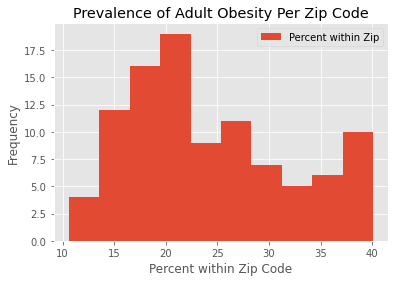

In [27]:
obese_count.plot.hist(x= 'Zip Code Frequency', y='Percent within Zip')
plt.title('Prevalence of Adult Obesity Per Zip Code')
plt.xlabel('Percent within Zip Code') 
plt.ylabel('Frequency')

In [28]:
# 17+ zip codes can say that ~20% of their respondents are considered obese. The highest prevalence of obesity a zip code has amongst respondents is 40%.

In [ ]:
# Now let's plot some of the health data

Text(0.5, 1.0, 'Walks at least 150 minutes per week in Los Angeles (2013-2014)')

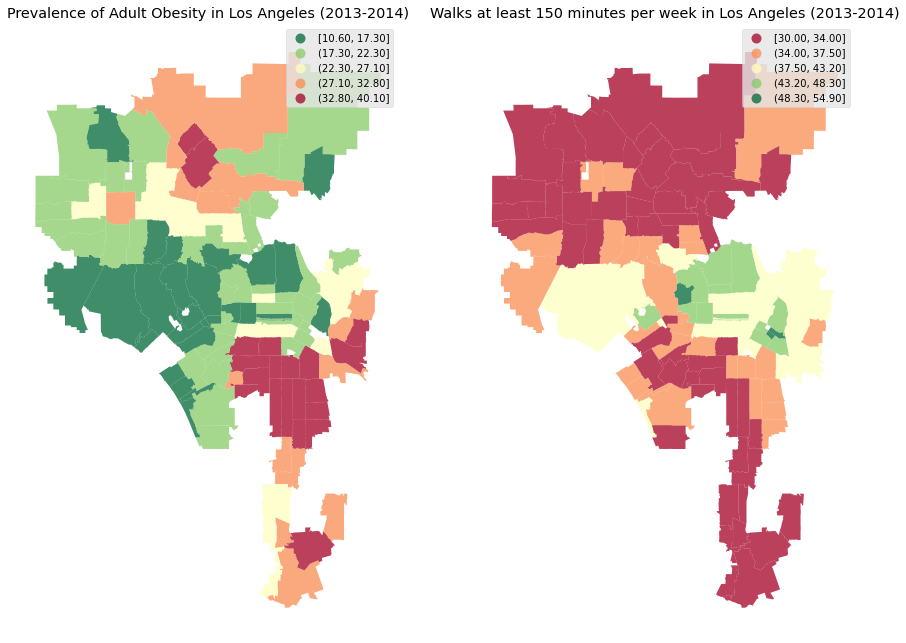

In [29]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs 

# regular count map on the left
obese.plot(column='Percent_', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Prevalence of Adult Obesity in Los Angeles (2013-2014)")

walkLA.plot(column='Percent_', 
            cmap='RdYlGn', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
          )
ax2.axis("off")
ax2.set_title("Walks at least 150 minutes per week in Los Angeles (2013-2014)")

In [ ]:
# South Central LA has some of the highest obesity rates amongst LA adults. 
# For most of the city, only 1/3 of respondents walk at least 150 min per week. The areas that walk the most are Downtown and West Hollywood/Hollywood. This is likely impacted by neighborhood walkability factors.

Text(0.5, 1.0, 'Prevalence of Heart Disease in Los Angeles (2013-2014)')

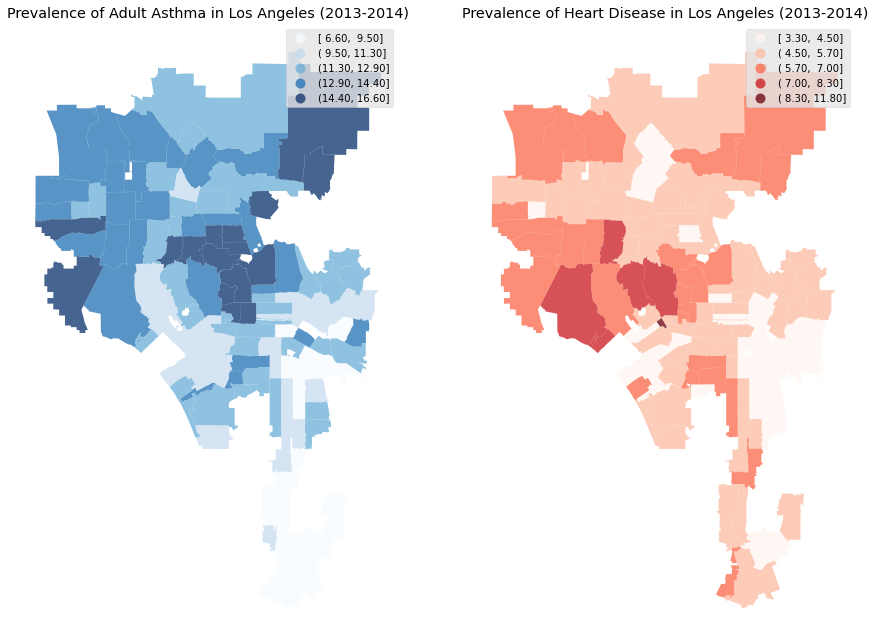

In [30]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs 

# regular count map on the left
asthma.plot(column='Percent_', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Prevalence of Adult Asthma in Los Angeles (2013-2014)")

heart.plot(column='Percent_', 
            cmap='Reds', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
          )
ax2.axis("off")
ax2.set_title("Prevalence of Heart Disease in Los Angeles (2013-2014)")

In [ ]:
# Interestingly, high obesity rates don't necessarily correspond with asthma and heart disease! 

(-118.93483809128055,
 -118.13077601713445,
 33.673729135925996,
 34.35963072207171)

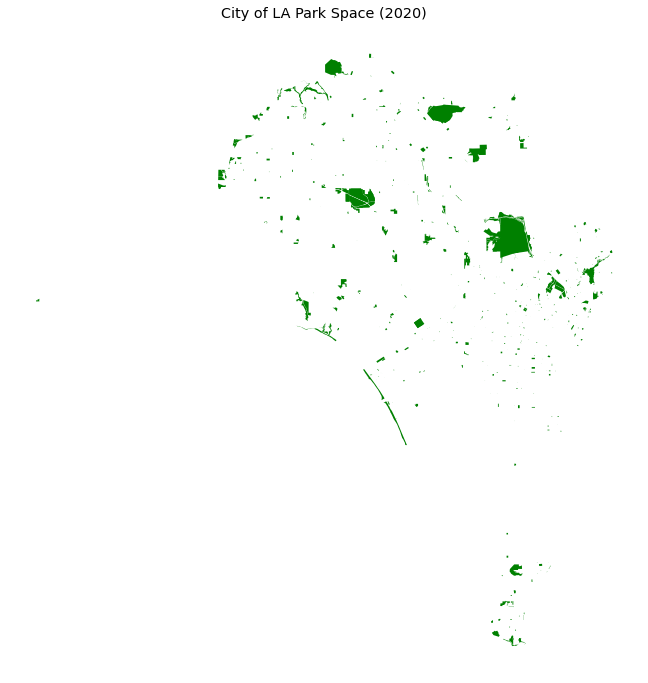

In [69]:
fig, ax = plt.subplots(figsize=(14,12))
parksLA.plot(ax=ax, color= 'green')
plt.title("City of LA Park Space (2020)")
legend = True
edgecolor='white'
ax.axis("off")

In [ ]:
# What does the lat/long look like for the parks data?

In [32]:
parksLA.geometry[:5]

0    POLYGON ((-118.64451 34.21238, -118.64451 34.2...
1    POLYGON ((-118.29192 33.71197, -118.29192 33.7...
2    POLYGON ((-118.24925 33.93590, -118.24917 33.9...
3    POLYGON ((-118.32523 34.00014, -118.32523 34.0...
4    POLYGON ((-118.28680 33.99881, -118.28664 33.9...
Name: geometry, dtype: geometry

In [ ]:
# Now let's see how the map looks

(-13239765.613901788,
 -13150257.833241664,
 3961368.8408354716,
 4053063.065113942)

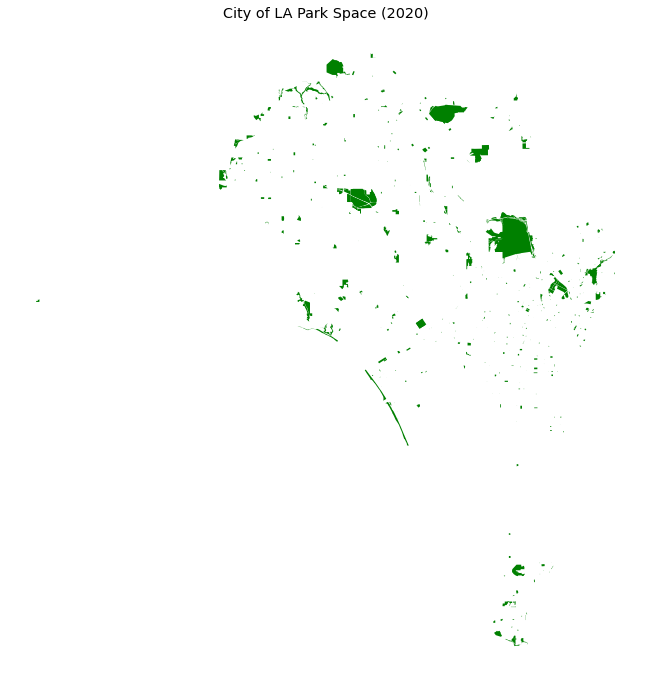

In [62]:
fig, ax = plt.subplots(figsize=(14,12))
parksLA_projected.plot(ax=ax, color= 'green')
plt.title("City of LA Park Space (2020)")
legend = True
edgecolor='white'
ax.axis("off")

In [ ]:
# Now let's overlay the slow streets layers

(-118.93483809128054,
 -118.13077601713444,
 33.673729135925996,
 34.35963072207171)

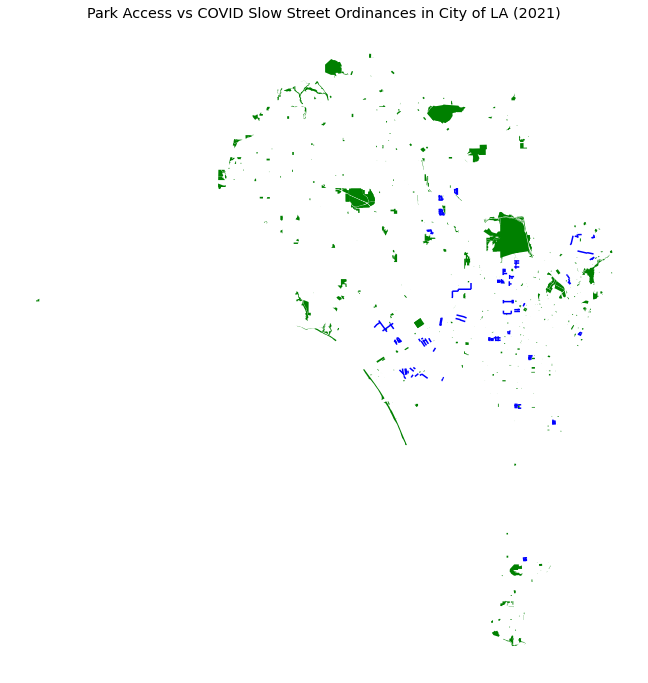

In [70]:
fig, ax = plt.subplots(figsize=(14,12))
streetsLA.plot(ax=ax, color='blue'); 
parksLA.plot(ax=ax, color= 'green')
plt.title("Park Access vs COVID Slow Street Ordinances in City of LA (2021)")
legend = True
edgecolor='white'
ax.axis("off")

In [ ]:
# Let's add a third layer to begin looking at zip codes with high obesity prevalence

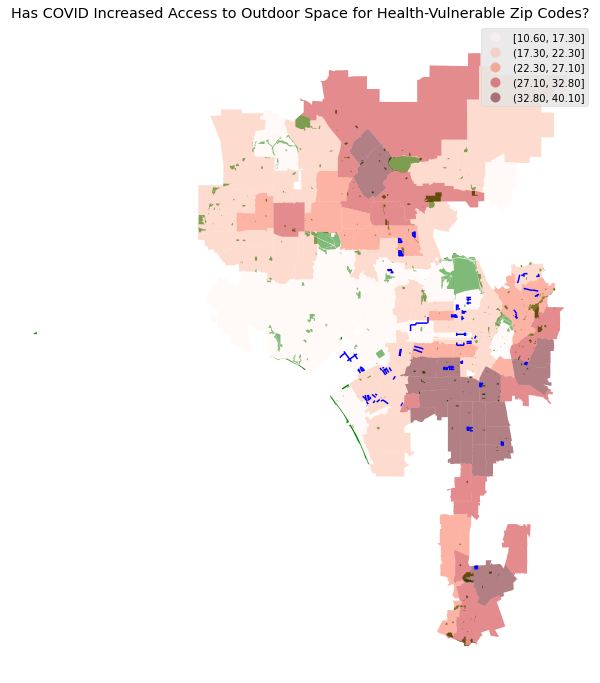

In [111]:
fig, ax = plt.subplots(figsize=(12, 12))

# name each subplot
ax.axis('off') 

ax.set_title("Has COVID Increased Access to Outdoor Space for Health-Vulnerable Zip Codes?")

streetsLA.plot(ax=ax, color='blue', legend=True)
parksLA.plot(ax=ax, color='green', legend=True)

# regular count map on the left
obese.plot(column=obese['Percent_'],
            alpha = 0.50,
            cmap='Reds',
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            ax=ax, 
           legend=True,
           )

In [ ]:
# Let's filter out all the zip codes with greater than 25% obesity rates.

/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:1712: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:1713: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % uvk, UserWarning)


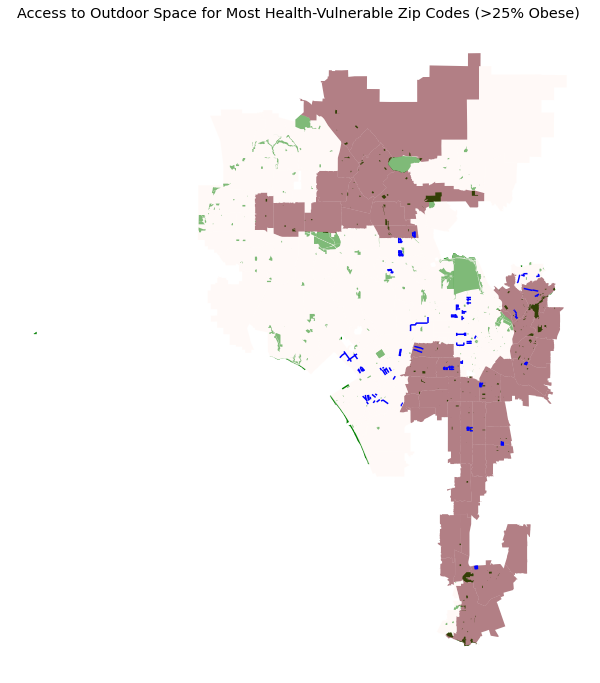

In [116]:
fig, ax = plt.subplots(figsize=(12, 12))

# name each subplot
ax.axis('off') 

ax.set_title("Access to Outdoor Space for Most Health-Vulnerable Zip Codes (>25% Obese) ")

streetsLA.plot(ax=ax, color='blue', legend=True)
parksLA.plot(ax=ax, color='green', legend=True)

# regular count map on the left
obese.plot(column=obese['Percent_'] >= 25,
            alpha = 0.50,
            cmap='Reds',
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            ax=ax, 
           )

In [ ]:
# Now let's make a live map that becomes interactive. For this example, let's plot all parks AND slow streets

In [40]:
import folium

In [ ]:
# Set the initial location of the map to be zoomed to City of LA center

In [117]:
m = folium.Map()
folium.Map(location=[34.00158291566265, -118.251045313253], zoom_start=11)

In [118]:
# Now let's add the data layers

In [119]:
m = folium.Map(
    location=[34.00158291566265, -118.251045313253],
    tiles="cartodbpositron",
    zoom_start=10,
)

folium.GeoJson(streetsLA).add_to(m)
folium.GeoJson(parksLA).add_to(m)
m

In [ ]:
# This map shows us all the parks AND slow streets in LA. The next step post-midterm is to begin making layers of areas that have no access to either parks or slow streets.

In [ ]:
# Save the file so we can export a link

In [127]:
m.save(outfile='map.html')